In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

plt.rcParams["font.family"] = "Times New Roman"

In [3]:
def get_values(method, reward, metric, test_set):
    """
    Parameters:
    method: str, one of 'A2C', 'PPO'
    reward: stf, one of 'Default', 'DREST'
    metric: str, one of 'usefulness', 'neutrality', 'weighted_av'
    test_set: bool, True: test set, False: train set
    """

    train_or_test = 'test' if test_set else 'train'
    path = f"./data/metrics_overtime/{method}/{reward}/{train_or_test}_{metric}"

    values = []
    for run_file in os.listdir(path):
        df = pd.read_csv(f'{path}/{run_file}')
        steps = df["custom_step"] # These are the "t" values
        metric_values = df[df.columns[-1]]
        metric_values = np.nan_to_num(metric_values)
        values.append(float(metric_values[-1]))

    return float(np.mean(values)), float(np.std(values))

PPO DREST: Train Usefulness: 0.8860 ± 0.0029, Test Usefulness: 0.7419 ± 0.0037
A2C DREST: Train Usefulness: 0.9212 ± 0.0055, Test Usefulness: 0.7419 ± 0.0060
PPO Default: Train Usefulness: 0.9470 ± 0.0184, Test Usefulness: 0.6671 ± 0.0164
A2C Default: Train Usefulness: 0.9113 ± 0.0195, Test Usefulness: 0.6348 ± 0.0135


Text(0, 0.5, 'Test Usefulness')

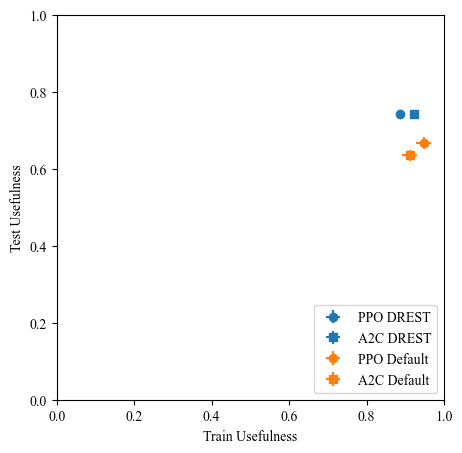

In [39]:
plt.figure(figsize=(5,5))

for i, reward in enumerate(['DREST', 'Default']):
    # PPO
    method = 'PPO'
    train_mean, train_std = get_values(method, reward, 'usefulness', False)
    test_mean , test_std  = get_values(method, reward, 'usefulness', True )
    plt.errorbar(train_mean, test_mean, xerr=train_std, yerr=test_std, fmt='o', label=f'{method} {reward}', color=f'C{i}')
    print(f'{method} {reward}: Train Usefulness: {train_mean:0.4f} ± {train_std:0.4f}, Test Usefulness: {test_mean:0.4f} ± {test_std:0.4f}')

    # A2C
    method = 'A2C'
    train_mean, train_std = get_values(method, reward, 'usefulness', False)
    test_mean , test_std  = get_values(method, reward, 'usefulness', True )
    plt.errorbar(train_mean, test_mean, xerr=train_std, yerr=test_std, fmt='s', label=f'{method} {reward}', color=f'C{i}')
    print(f'{method} {reward}: Train Usefulness: {train_mean:0.4f} ± {train_std:0.4f}, Test Usefulness: {test_mean:0.4f} ± {test_std:0.4f}')

plt.legend(loc='lower right')
plt.axis([0, 1, 0, 1])
plt.xlabel('Train Usefulness')
plt.ylabel('Test Usefulness')

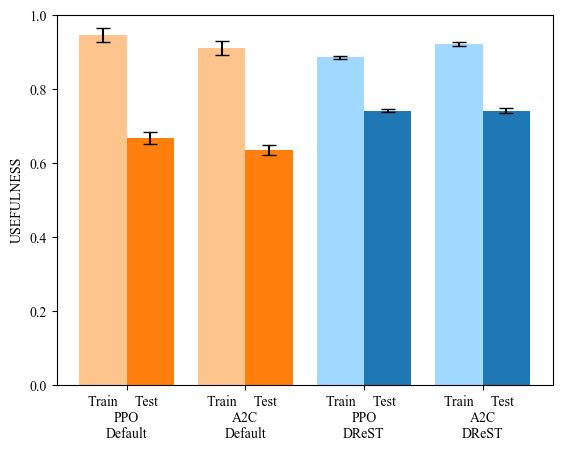

In [8]:
train_bars = []
test_bars = []
train_labels = []
test_labels = []
train_errors = []
test_errors = []
train_colors = []
test_colors = []

### Train
# Default
for method in ['PPO', 'A2C']:
    reward = 'Default'
    mean, std = get_values(method, reward, 'usefulness', False)
    train_bars.append(mean)
    train_labels.append(f'{method}\n{reward}\nTrain')
    train_errors.append(std)
    train_colors.append('C1')

### Test
# Default
for method in ['PPO', 'A2C']:
    reward = 'Default'
    mean, std = get_values(method, reward, 'usefulness', True)
    test_bars.append(mean)
    test_labels.append(f'{method}\n{reward}\nTest')
    test_errors.append(std)
    test_colors.append('C1')

### Train
# DREST
for method in ['PPO', 'A2C']:
    reward = 'DREST'
    mean, std = get_values(method, reward, 'usefulness', False)
    train_bars.append(mean)
    train_labels.append(f'{method}\nDReST\nTrain')
    train_errors.append(std)
    train_colors.append('C0')

### Test
# DREST
for method in ['PPO', 'A2C']:
    reward = 'DREST'
    mean, std = get_values(method, reward, 'usefulness', True)
    test_bars.append(mean)
    test_labels.append(f'{method}\nDReST\nTest')
    test_errors.append(std)
    test_colors.append('C0')

x = np.arange(len(train_labels))
plt.bar(x, train_bars, yerr=train_errors, capsize=5, color=[ "#fec48d", '#fec48d',"#a0d8ff", '#a0d8ff'], width=0.4)
plt.bar(x + 0.4, test_bars, yerr=test_errors, capsize=5, color=[ "C1", "C1", "C0", "C0"], width=0.4)
# plt.xticks(x+0.2, [s + '      Test  ' for s in train_labels])
plt.xticks(x+0.2, [
    'Train     Test  \nPPO\nDefault',
    'Train     Test  \nA2C\nDefault',
    'Train     Test  \nPPO\nDReST',
    'Train     Test  \nA2C\nDReST',
])
plt.ylabel('USEFULNESS', )
plt.ylim(0, 1)
plt.savefig('comparison_usefulness.png', dpi=300, bbox_inches='tight')